# Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

2024-05-03 20:24:54.326586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 20:24:54.326748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 20:24:54.486475: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load dataset

In [2]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# EDA

## Remove unwanted columns and rename the needed ones

In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']

In [4]:
data.isna().sum()

label    0
text     0
dtype: int64

In [5]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Check distribution of spam vs. non-spam

In [6]:
data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

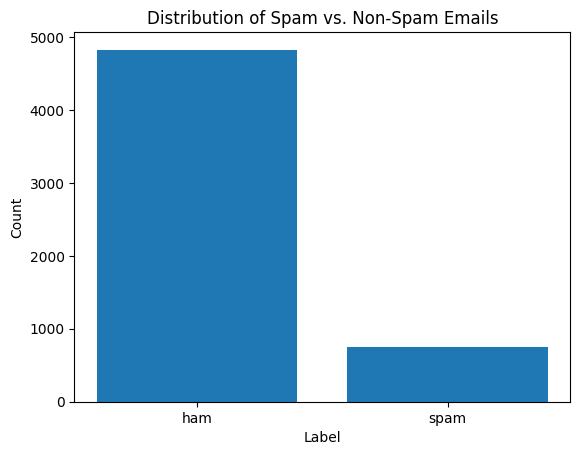

In [7]:
spam_counts = data['label'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.show()

## Analyze common words
- Analyze common words in spam emails
- Visualize top 20 most common words in spam emails

In [8]:
# first get spam dataset and ham dataset
spam_data = data[data['label'] == 'spam']
ham_data = data[data['label'] == 'ham']

# get every word of each spam and ham email and put them in an array
spam_words = ' '.join(spam_data['text']).split()
ham_words = ' '.join(ham_data['text']).split()

from collections import Counter
# count how many each word appeared in the emails
spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

In [9]:
spam_data.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
spam_words[:5]

['Free', 'entry', 'in', '2', 'a']

In [11]:
dict(list(spam_word_counts.items())[:5])

{'Free': 35, 'entry': 25, 'in': 64, '2': 169, 'a': 358}

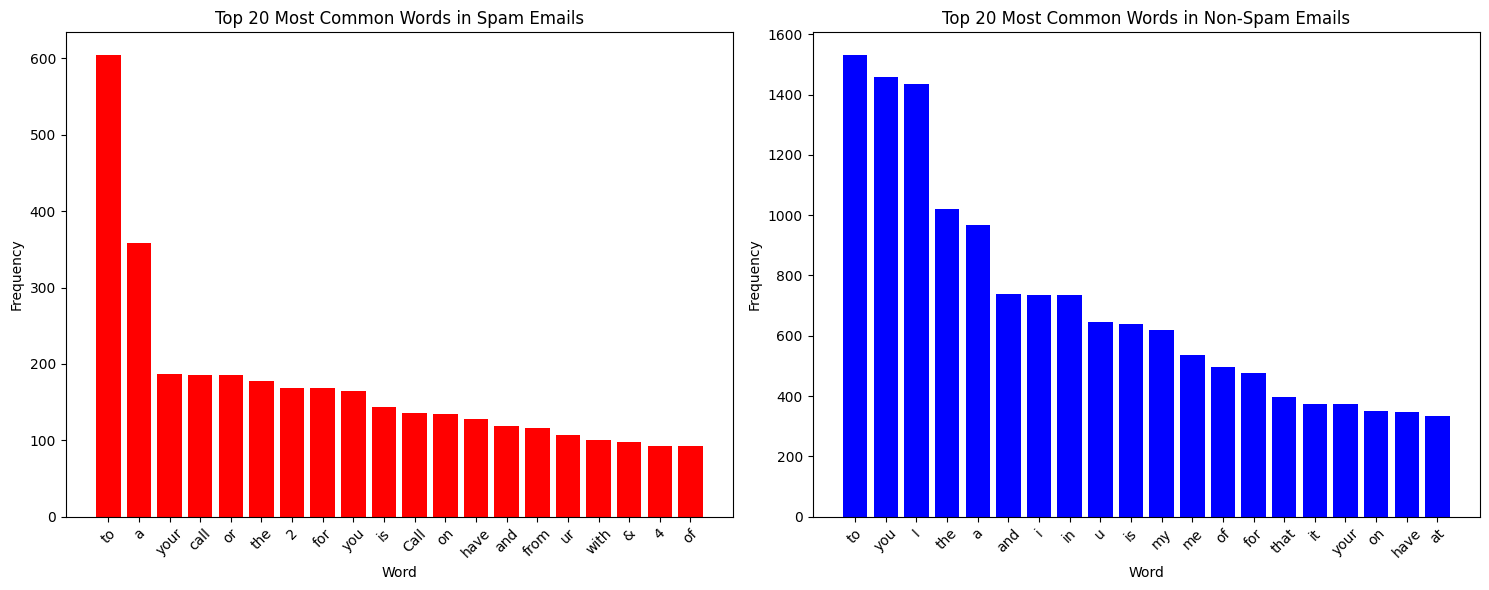

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(*zip(*spam_word_counts.most_common(20)), color='red')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 20 Most Common Words in Spam Emails')
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(*zip(*ham_word_counts.most_common(20)), color='blue')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 20 Most Common Words in Non-Spam Emails')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Create the spam column

In [13]:
data['spam'] = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [14]:
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Create X and Y

In [15]:
X = data['text']
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [16]:
y = data['spam']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: int64

# Feature engineering
Text Encoding: Converting text into numerical representations using TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [18]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Handling imbalanced data
Oversampling: Creating synthetic samples of the minority class (spam) to balance the dataset.

### Show the count of spam and ham

In [19]:
data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Resample training data using RandomOverSampler

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

over_sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8672), (1115, 8672), (4457,), (1115,))

In [22]:
X_train_resampled.shape, y_train_resampled.shape

((7720, 8672), (7720,))

In [23]:
y_train_resampled

0       0
1       1
2       0
3       0
4       1
       ..
7715    1
7716    1
7717    1
7718    1
7719    1
Name: spam, Length: 7720, dtype: int64

# Neural Network model

### create a NN model using Tensorflow

In [24]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

# Define model architecture
model = Sequential([
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled.toarray(), y_train_resampled, epochs=5, batch_size=32)

Epoch 1/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9177 - loss: 0.3496
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 2.4585e-04
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.1209e-04
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 6.3371e-05


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       867,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,620,175 (10.00 MB)

 Trainable params: 873,391 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,746,784 (6.66 MB)

### Evaluate model

In [26]:
model.evaluate(X_test.toarray(), y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.0663


[0.10845909267663956, 0.9784753322601318]

### Make predictions

In [27]:
preds = model.predict(X_test.toarray())

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
preds[:5]

array([[2.5702114e-04],
       [8.6247774e-06],
       [9.7710228e-01],
       [1.4398109e-06],
       [9.9999839e-01]], dtype=float32)

### Classification report

In [29]:
from sklearn.metrics import classification_report

binary_preds = (preds > 0.5).astype(int)
report = classification_report(y_test, binary_preds)

print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Predict on new Eamils

In [30]:
new_emails_array = [
    "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]
new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = model.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds> 0.5).astype(int)
for i in range(len(new_emails_preds)):
  print(f"Email: {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Email: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email: Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. ham✅
Email: Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email: URGENT: Your account has been locked. Please verify your identity to unlock it.. spam❌
Email: Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅


# SKlearn models

## Initialize classifiers

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

nb_classifier = MultinomialNB()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

my_models = [nb_classifier, svm_classifier, dt_classifier]

## Train classifiers

In [32]:
for m in (my_models):
  m.fit(X_train, y_train)

## Make predictions

In [33]:
for m in (my_models):
  y_pred = m.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{m} Accuracy on test set: {accuracy * 100:.2f}")

MultinomialNB() Accuracy on test set: 96.23
SVC() Accuracy on test set: 97.67
DecisionTreeClassifier() Accuracy on test set: 96.95


In [34]:
new_emails_array = [
    "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]
new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = svm_classifier.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds> 0.5).astype(int)
for i in range(len(new_emails_preds)):
  print(f"Email: {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

Email: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email: Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. ham✅
Email: Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email: URGENT: Your account has been locked. Please verify your identity to unlock it.. ham✅
Email: Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅
